In [2]:
%matplotlib notebook
%matplotlib inline

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
housing_df = pd.read_csv("DC_Properties.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
housing_df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [6]:
housing_df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [7]:
housing_df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

In [8]:
housing_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [9]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
housing_df2.head(20)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0,11.0
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2000.0,8.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0,6.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0,7.0
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,NaN,NaN
5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2010.0,2.0
6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,1957,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2011.0,5.0
7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,1972,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2011.0,9.0
8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,1967,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2018.0,5.0
9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,1950,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2008.0,12.0


In [10]:
housing_df3 = housing_df2[housing_df2.PRICE > .01]

In [11]:
housing_df4 = housing_df3[housing_df3['SOURCE'].str.contains("Residential")]

In [12]:
housing_df5 = housing_df4[housing_df4.YEAR > 1991]

In [13]:
housing_df5.count()

BATHRM                57887
HF_BATHRM             57887
HEAT                  57887
AC                    57887
NUM_UNITS             57887
ROOMS                 57887
BEDRM                 57887
AYB                   57792
YR_RMDL               33214
EYB                   57887
STORIES               57854
SALEDATE              57887
PRICE                 57887
QUALIFIED             57887
SALE_NUM              57887
GBA                   57887
STYLE                 57887
STRUCT                57887
GRADE                 57887
CNDTN                 57887
EXTWALL               57887
ROOF                  57887
INTWALL               57887
KITCHENS              57886
FIREPLACES            57887
USECODE               57887
LANDAREA              57887
GIS_LAST_MOD_DTTM     57887
SOURCE                57887
CMPLX_NUM                 0
LIVING_GBA                0
FULLADDRESS           57552
CITY                  57556
STATE                 57556
ZIPCODE               57887
LATITUDE            

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'PRICE')

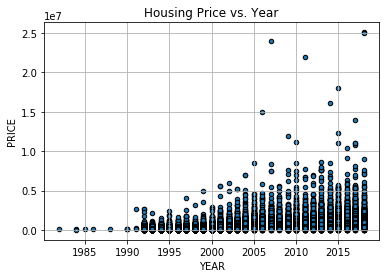

In [14]:
housing_df5['PRICE'] = pd.to_numeric(housing_df5['PRICE'])
housing_df5['YEAR'] = pd.to_numeric(housing_df5['YEAR'])

housing_df4.plot(kind="scatter", x="YEAR", y="PRICE", marker="o", facecolors="blue", edgecolors="black", title="Housing Price vs. Year", grid=True)
plt.xlabel("YEAR")
plt.ylabel("PRICE")

In [15]:
housing_df5['PRICE'] = pd.to_numeric(housing_df5['PRICE'])
housing_df5['PRICE'] = housing_df5['PRICE'].astype('int64')
df_year = housing_df5.groupby("YEAR").PRICE.agg(["min", "mean", "max", "count"])
df_year

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,min,mean,max,count
YEAR,,,,
1992.0,23625,235334.285303,2620000,694
1993.0,3000,217414.979626,2150000,589
1994.0,1000,217821.676056,1450000,710
1995.0,14500,219253.386807,2450000,667
1996.0,936,217792.614883,1685740,766
1997.0,250,232816.539666,4115000,958
1998.0,10,222925.642609,3120000,1150
1999.0,250,255624.005460,5000000,1282
2000.0,1,261697.673183,2925000,1637


Text(0, 0.5, 'PRICE')

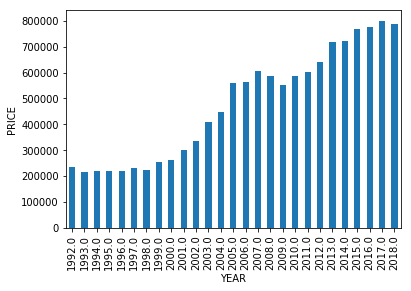

In [16]:
df_year["mean"].plot(kind="bar")
plt.ylabel("PRICE")

In [17]:
df_ward = housing_df5.groupby("WARD").PRICE.agg(["min", "mean", "max", "count"])
df_ward

,min,mean,max,count
WARD,,,,
Ward 1,10,5.966421e+05,7000000,4638
Ward 2,10,1.307805e+06,23960287,3397
Ward 3,12365,1.072074e+06,18000000,7897
Ward 4,250,5.063740e+05,5000000,10410
Ward 5,1,4.092363e+05,5250000,9570
Ward 6,250,5.992872e+05,11000000,9605
Ward 7,10,2.370929e+05,11000000,7809
Ward 8,1,2.415137e+05,25100000,4561


Text(0, 0.5, 'PRICE')

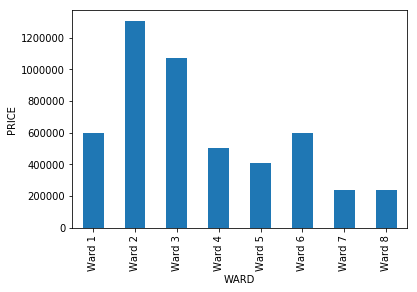

In [18]:
df_ward["mean"].plot(kind="bar")
plt.ylabel("PRICE")

In [19]:
df_QUADRANT = housing_df5.groupby("QUADRANT").PRICE.agg(["min", "mean", "max", "count"])
df_QUADRANT

,min,mean,max,count
QUADRANT,,,,
NE,1,402959.386842,7576980,17860
NW,10,790172.995087,23960287,27478
SE,250,372487.053162,25100000,11719
SW,1,346557.688615,11000000,729


Text(0, 0.5, 'PRICE')

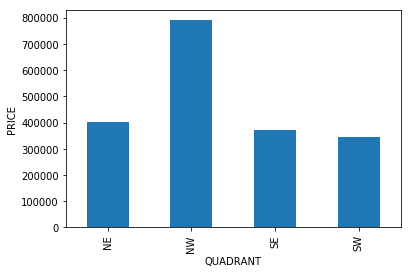

In [20]:
df_QUADRANT["mean"].plot(kind="bar")
plt.ylabel("PRICE")

In [21]:
df_reno = housing_df5[housing_df5.YR_RMDL > 1991]
df_reno1 = df_reno.groupby("YR_RMDL").PRICE.agg(["min", "mean", "max", "count"])
df_reno1

,min,mean,max,count
YR_RMDL,,,,
1992.0,15000,553471.354592,3295000,392
1993.0,50000,647551.464286,2250000,84
1994.0,47500,686972.131944,6500000,144
1995.0,30000,786312.956140,14000000,228
1996.0,936,631834.438889,2700000,180
1997.0,69000,729116.842697,2635000,89
1998.0,45789,796184.408511,3200000,235
1999.0,1,780207.887850,4700000,214
2000.0,11000,781239.676354,7365000,757


Text(0, 0.5, 'PRICE')

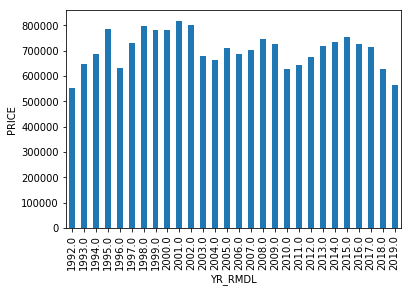

In [22]:
df_reno1["mean"].plot(kind="bar")
plt.ylabel("PRICE")

In [23]:
#Just remodeled homes from 1992 and onwards
df_reno_quad = df_reno.groupby("QUADRANT").PRICE.agg(["min", "mean", "max", "count"])
df_reno_quad

,min,mean,max,count
QUADRANT,,,,
NE,250,485602.174250,4069000,8505
NW,10,915407.255981,23960287,14798
SE,250,471613.652612,11000000,4957
SW,1,360290.882629,1125000,213


Text(0, 0.5, 'PRICE')

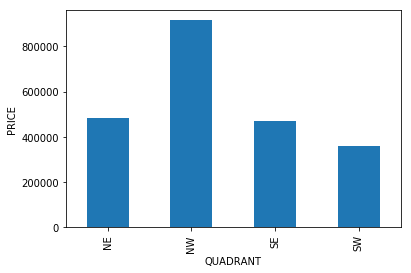

In [24]:
df_reno_quad["mean"].plot(kind="bar")
plt.ylabel("PRICE")

In [25]:
#Just remodeled homes from 1992 and onwards
df_reno_ward = df_reno.groupby("WARD").PRICE.agg(["min", "mean", "max", "count"])
df_reno_ward

,min,mean,max,count
WARD,,,,
Ward 1,250,6.883547e+05,2970000,2776
Ward 2,10,1.516174e+06,23960287,2113
Ward 3,30000,1.205115e+06,15000000,3909
Ward 4,28798,6.065536e+05,3000000,5001
Ward 5,250,4.854645e+05,4069000,4316
Ward 6,250,6.757911e+05,3150000,5835
Ward 7,5000,2.710722e+05,11000000,3122
Ward 8,1,2.579581e+05,4739000,1457


Text(0, 0.5, 'PRICE')

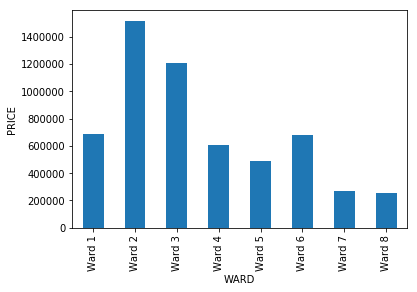

In [26]:
df_reno_ward["mean"].plot(kind="bar")
plt.ylabel("PRICE")

Text(0, 0.5, 'Price')

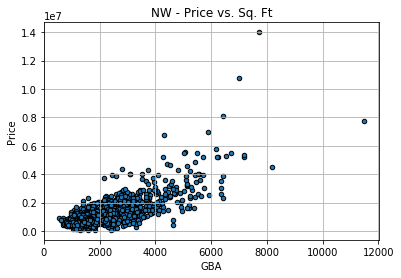

In [44]:
NW = housing_df5[housing_df5.QUADRANT == "NW"]
NW_2017 = NW[NW.YEAR == 2017]
NW_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", title="NW - Price vs. Sq. Ft", grid=True)
plt.xlabel("GBA")
plt.ylabel("Price")


Text(0, 0.5, 'Price')

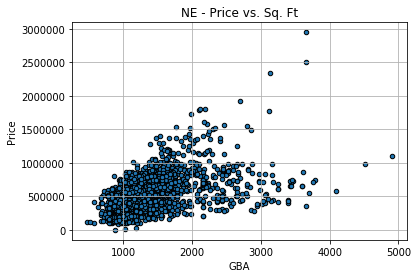

In [45]:
NE = housing_df5[housing_df5.QUADRANT == "NE"]
NE_2017 = NE[NE.YEAR == 2017]
NE_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", title="NE - Price vs. Sq. Ft", grid=True)
plt.xlabel("GBA")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

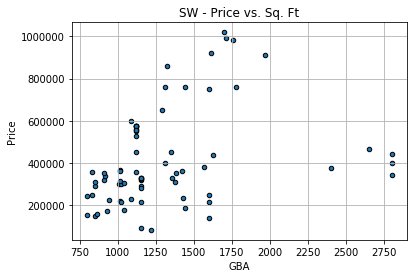

In [46]:
SW = housing_df5[housing_df5.QUADRANT == "SW"]
SW_2017 = SW[SW.YEAR == 2017]
SW_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", title="SW - Price vs. Sq. Ft", grid=True)
plt.xlabel("GBA")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

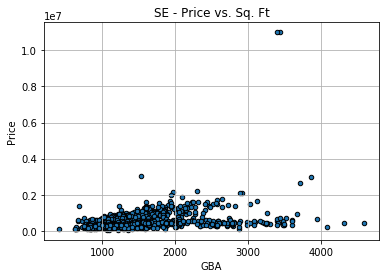

In [48]:
SE = housing_df5[housing_df5.QUADRANT == "SE"]
SE_2017 = SE[SE.YEAR == 2017]
SE_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", title="SE - Price vs. Sq. Ft", grid=True)
plt.xlabel("GBA")
plt.ylabel("Price")

In [36]:
brooms = housing_df5.groupby("BEDRM").PRICE.agg(["min", "mean", "max", "count"])
brooms

,min,mean,max,count
BEDRM,,,,
0,45921,1.345881e+06,25100000,68
1,14500,4.363093e+05,6750000,204
2,10,3.709684e+05,5600000,8366
3,1,4.566535e+05,7576980,27652
4,500,6.592719e+05,11000000,14449
5,250,1.037030e+06,7652000,4262
6,1,1.267161e+06,14000000,1870
7,500,1.717842e+06,18000000,446
8,14000,8.107116e+05,11111111,461


Text(0, 0.5, 'PRICE')

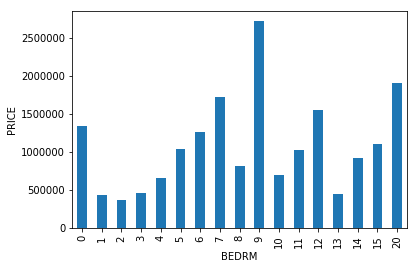

In [37]:
brooms["mean"].plot(kind="bar")
plt.ylabel("PRICE")

In [38]:
bedroom_3 = housing_df5[housing_df5.BEDRM == 3]
bedroom_3

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,1967,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2018.0,5.0
14,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,1967,...,-77.039716,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2011.0,9.0
16,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,1967,...,-77.039844,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2010.0,11.0
19,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,1969,...,-77.040138,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2001.0,7.0
22,1,0,Forced Air,Y,1.0,6,3,1880.0,2010.0,1967,...,-77.033925,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,NW,2006.0,1.0
23,2,1,Forced Air,Y,1.0,5,3,1880.0,2010.0,1984,...,-77.033972,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,NW,2012.0,8.0
24,2,1,Hot Water Rad,Y,1.0,8,3,1880.0,2004.0,1967,...,-77.034070,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,NW,2012.0,7.0
27,3,0,Hot Water Rad,Y,4.0,9,3,1900.0,1963.0,1967,...,-77.034182,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,NW,2005.0,4.0
29,3,1,Forced Air,Y,2.0,11,3,1900.0,2014.0,1984,...,-77.034051,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,NW,2013.0,12.0
48,2,1,Forced Air,N,2.0,8,3,1976.0,NaN,1984,...,-77.032951,Old City 2,040 E Old City 2,5201.0,005201 4002,Ward 2,208,NW,1999.0,12.0


In [40]:
bedroom_3_year = bedroom_3.groupby("YEAR").PRICE.agg(["min", "mean", "max", "count"])
bedroom_3_year

,min,mean,max,count
YEAR,,,,
1992.0,23625,178071.737752,799000,347
1993.0,3000,174996.610759,590000,316
1994.0,1000,194002.888587,1075000,368
1995.0,30000,187284.278090,805000,356
1996.0,12000,183269.935714,1685740,420
1997.0,15000,179621.856046,1200000,521
1998.0,10,181809.873122,3120000,599
1999.0,250,196320.332797,1025000,622
2000.0,1,201491.475669,1135000,822


Text(0.5, 1.0, '3-Bedroom Home Px by Year')

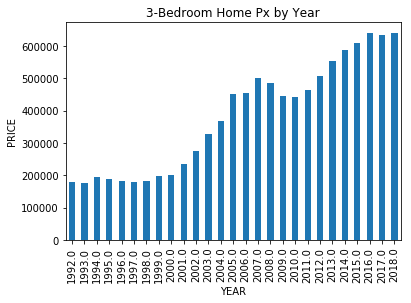

In [42]:
bedroom_3_year["mean"].plot(kind="bar")
plt.ylabel("PRICE")
plt.title("3-Bedroom Home Px by Year")

In [ ]:
SE = housing_df5[housing_df5.QUADRANT == "SE"]